In [1]:
import pandas as pd
import numpy as np

# Load data

In [5]:
hospital_data = pd.read_csv(r'C:\Users\nick2\Desktop\MS\Sem-2\ML\Hackerrank\Vertex\hospital_mortality.csv')
hospital_data.head(5)

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
0,132539.0,54.0,0.0,-1.0,4.0,8.0,0.7,14.0,115.0,26.0,...,1.0,NaN,NaN,36.0,3.1,900.0,1.8,0.0,NaN,0
1,132540.0,76.0,1.0,175.3,2.0,16.0,0.8,3.0,105.0,21.0,...,4.0,13.0,363.0,91.0,3.4,770.0,5.9,5.6,0.11,0
2,132541.0,44.0,0.0,-1.0,3.0,3.0,0.3,5.0,119.0,24.0,...,3.0,4.0,167.0,41.0,2.3,407.0,2.5,0.0,0.04,0
3,132543.0,68.0,1.0,180.3,3.0,10.0,0.7,14.0,106.0,27.0,...,4.0,NaN,NaN,107.0,1.9,600.0,3.6,0.0,NaN,0
4,132545.0,88.0,0.0,-1.0,3.0,25.0,1.0,15.0,92.0,18.0,...,1.0,NaN,NaN,12.0,2.0,204.0,1.0,0.0,NaN,0


In [6]:
hospital_data.describe()

,PATIENT_ID,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,...,Na_Range,PaCO2_Range,PaO2_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,pH_Range,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,3936.000000,3936.000000,3936.000000,3887.000000,3924.000000,...,3925.000000,3023.000000,3023.000000,3932.000000,3936.000000,3883.000000,3927.000000,4000.000000,3040.000000,4000.000000
mean,137605.122000,64.247500,0.560750,88.919475,2.760000,21.922764,1.183587,8.222561,108.587857,21.847757,...,3.801019,12.925471,157.563523,54.614700,2.902947,586.457559,4.589827,3.597792,0.724138,0.138500
std,2923.608886,17.560946,0.497867,86.531203,1.002572,18.672749,1.208433,4.805520,29.886359,4.523173,...,3.266361,10.045247,121.089989,48.852811,6.039792,582.522376,4.897072,10.969927,19.054599,0.345467
min,132539.000000,15.000000,-1.000000,-1.000000,1.000000,0.000000,0.100000,3.000000,10.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,135075.750000,52.750000,0.000000,-1.000000,2.000000,11.000000,0.600000,3.000000,90.000000,19.000000,...,2.000000,6.000000,51.000000,21.000000,1.400000,260.000000,1.600000,0.000000,0.060000,0.000000
50%,137592.500000,67.000000,1.000000,152.400000,3.000000,16.000000,0.800000,7.000000,106.000000,22.000000,...,3.000000,12.000000,136.000000,42.000000,1.900000,430.000000,3.400000,0.000000,0.110000,0.000000
75%,140100.250000,78.000000,1.000000,170.200000,4.000000,26.000000,1.200000,14.000000,124.000000,24.000000,...,5.000000,18.000000,261.000000,74.000000,2.500000,700.000000,6.200000,3.200000,0.180000,0.000000
max,142673.000000,90.000000,1.000000,431.800000,4.000000,165.000000,13.300000,15.000000,298.000000,44.000000,...,40.000000,68.000000,446.000000,496.000000,57.100000,11000.000000,129.800000,236.000000,727.680000,1.000000


In [7]:
hospital_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Columns: 111 entries, PATIENT_ID to In-hospital_death
dtypes: float64(110), int64(1)
memory usage: 3.4 MB


### How many patients have 20 or more missing feature values? 

In [8]:
count=0
for patient in range(0,len(hospital_data)):
    missing_features=sum(hospital_data.iloc[patient,:].isnull())
    if missing_features>=20:
        count+=1
print('Total Number of patients having 20 or more missing feature values: {}'.format(count))        

Total Number of patients having 20 or more missing feature values: 210


### What’s the difference in means of HR_min for patients that died vs survived (not counting patients with HR_min of  0)?

In [9]:
# Removing patients with HR_Min=0 from data
new_data=hospital_data[hospital_data['HR_Min']!=0]

# Finding mean of HR_Min for patients that died
died=new_data[new_data['In-hospital_death']==1]
Mean_died=np.sum(died['HR_Min'])/len(died)

# Finding mean of HR_Min for patients that survived
survived=new_data[new_data['In-hospital_death']==0]
Mean_survived=np.sum(survived['HR_Min'])/len(survived)

# Calculating difference between two means
diff=Mean_died-Mean_survived

# I have used np.nan instead of sum() to sum to include nan in the addition

print('Difference in means of HR_Min for patients that have died Vs Survived is {:.4f}'.format(diff))

Difference in means of HR_Min for patients that have died Vs Survived is 2.1886


### What is the median maximum heart rate for patients whose maximum temperature was 2 degrees Celsius higher than their minimum temperature?

In [10]:
import statistics
median_HR_max=statistics.median(hospital_data[hospital_data.Temp_Max-hospital_data.Temp_Min==2]['HR_Max'])
print('Median Maximum Heart Rate for patients whose Max Temp was 2 degrees Celsius higher than their Min Temperature is {}'.format(median_HR_max))

Median Maximum Heart Rate for patients whose Max Temp was 2 degrees Celsius higher than their Min Temperature is 109.0


In [18]:
import matplotlib.pyplot as plt

### Create a plot to analyze the relationship between median temperature, outcome (died vs. survived), and gender.

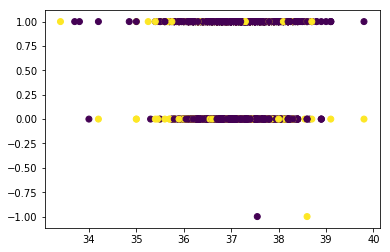

In [19]:
a=hospital_data
plt.scatter(a.Temp_Median, a.Gender,c=a['In-hospital_death'] )

### Build and summarize the results of a machine learning model that predicts whether a patient dies or survives in the hospital. (We do not expect a perfect or highest-accuracy solution; this is primarily an opportunity for you to show your machine learning project workflow and to document your thought process, approach to solving problems, and interpretation of results.)

In [359]:
# Removing samples for which Gender is other than 0 and 1
hospital_data=hospital_data[hospital_data.Gender!=-1]
# Finding Null values in each of the columns/features
columns=hospital_data.columns
Null_value_columns={}
for i in range(0,len(columns)):
    a=sum(hospital_data[columns[i]].isnull())
    if a>0:
        Null_value_columns[columns.values[i]]=a
Null_value_columns  

{'BUN_Min': 64,
 'Creatinine_Min': 64,
 'GCS_Min': 63,
 'Glucose_Min': 113,
 'HCO3_Min': 76,
 'HCT_Min': 64,
 'HR_Min': 62,
 'K_Min': 96,
 'Mg_Min': 103,
 'NIDiasABP_Min': 516,
 'NIMAP_Min': 518,
 'NISysABP_Min': 506,
 'Na_Min': 75,
 'PaCO2_Min': 976,
 'PaO2_Min': 976,
 'Platelets_Min': 68,
 'Temp_Min': 63,
 'Urine_Min': 116,
 'WBC_Min': 73,
 'pH_Min': 959,
 'BUN_Max': 64,
 'Creatinine_Max': 64,
 'GCS_Max': 63,
 'Glucose_Max': 113,
 'HCO3_Max': 76,
 'HCT_Max': 64,
 'HR_Max': 62,
 'K_Max': 96,
 'Mg_Max': 103,
 'NIDiasABP_Max': 516,
 'NIMAP_Max': 518,
 'NISysABP_Max': 506,
 'Na_Max': 75,
 'PaCO2_Max': 976,
 'PaO2_Max': 976,
 'Platelets_Max': 68,
 'Temp_Max': 63,
 'Urine_Max': 116,
 'WBC_Max': 73,
 'pH_Max': 959,
 'BUN_Mean': 64,
 'Creatinine_Mean': 64,
 'GCS_Mean': 63,
 'Glucose_Mean': 113,
 'HCO3_Mean': 76,
 'HCT_Mean': 64,
 'HR_Mean': 62,
 'K_Mean': 96,
 'Mg_Mean': 103,
 'NIDiasABP_Mean': 516,
 'NIMAP_Mean': 518,
 'NISysABP_Mean': 506,
 'Na_Mean': 75,
 'PaCO2_Mean': 976,
 'PaO2_Mean': 

- There were three samples for which Gender is not equal to 0 and 1, I have removed them from the data. As per Data Dictionary only two valid values for Gender are given.
- There are few columns which have more than 500 null values which is more than 12.5% of the total sample that we have. I cannot drop these many samples as I will lose a lot of information doing it, neither I can impute these missing values beacuse it will add bias to the data.
- So I am removing such columns with so many missing values from the analysis

In [360]:
hospital_data=hospital_data.drop(columns=['PATIENT_ID','NIDiasABP_Min','NIMAP_Min','NISysABP_Min','PaCO2_Min','PaO2_Min','pH_Mean','NIDiasABP_Max',
'NIMAP_Max','NISysABP_Max','PaCO2_Max','PaO2_Max','pH_Max', 'NIDiasABP_Mean','NIMAP_Mean',
'NISysABP_Mean','PaCO2_Mean','PaO2_Mean','pH_Mean','NIDiasABP_Median','NIMAP_Median',
'NISysABP_Median','PaCO2_Median','PaO2_Median','pH_Median','NIDiasABP_Range','NIMAP_Range',
'NISysABP_Range','PaCO2_Range','PaO2_Range','pH_Range','pH_Min'], axis=1)

- Now that I have removed these columns, I am replacing rest of the null values with column's median to capture the common values for each of the columns.
- I have also dropped patient_id as it is not going to make any contribution to the prediction.
- Each of these columns have missing values between 63 to 113 which is between 1.5% to 3% of the total samples that we have. Imputing these values makes sense.


In [361]:
# Replacing Null values with the median of each column
hospital_data=hospital_data.fillna(hospital_data.median())

In [362]:
hospital_data.isnull().any()

Age                  False
Gender               False
Height               False
ICUType              False
BUN_Min              False
Creatinine_Min       False
GCS_Min              False
Glucose_Min          False
HCO3_Min             False
HCT_Min              False
HR_Min               False
K_Min                False
Mg_Min               False
Na_Min               False
Platelets_Min        False
Temp_Min             False
Urine_Min            False
WBC_Min              False
Weight_Min           False
BUN_Max              False
Creatinine_Max       False
GCS_Max              False
Glucose_Max          False
HCO3_Max             False
HCT_Max              False
HR_Max               False
K_Max                False
Mg_Max               False
Na_Max               False
Platelets_Max        False
                     ...  
Creatinine_Median    False
GCS_Median           False
Glucose_Median       False
HCO3_Median          False
HCT_Median           False
HR_Median            False
K

In [350]:
hospital_data.describe()

,Age,Gender,Height,ICUType,BUN_Min,Creatinine_Min,GCS_Min,Glucose_Min,HCO3_Min,HCT_Min,...,HR_Range,K_Range,Mg_Range,Na_Range,Platelets_Range,Temp_Range,Urine_Range,WBC_Range,Weight_Range,In-hospital_death
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,...,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,64.247500,0.560750,88.919475,2.760000,21.828000,1.17745,8.203000,108.514750,21.850650,28.618775,...,43.899775,0.795275,0.466750,3.78600,54.400250,2.886900,581.881175,4.568112,3.597792,0.138500
std,17.560946,0.497867,86.531203,1.002572,18.537633,1.19969,4.769379,29.464204,4.480034,5.306754,...,20.703657,0.794020,0.419587,3.23741,48.463127,5.992589,574.542954,4.854783,10.969927,0.345467
min,15.000000,-1.000000,-1.000000,1.000000,0.000000,0.10000,3.000000,10.000000,5.000000,9.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.750000,0.000000,-1.000000,2.000000,11.000000,0.60000,3.000000,91.000000,19.000000,25.000000,...,30.000000,0.400000,0.200000,2.00000,21.000000,1.400000,270.000000,1.600000,0.000000,0.000000
50%,67.000000,1.000000,152.400000,3.000000,16.000000,0.80000,7.000000,106.000000,22.000000,28.000000,...,40.000000,0.600000,0.400000,3.00000,42.000000,1.900000,430.000000,3.400000,0.000000,0.000000
75%,78.000000,1.000000,170.200000,4.000000,26.000000,1.20000,14.000000,123.000000,24.000000,31.900000,...,52.000000,1.000000,0.700000,5.00000,73.000000,2.500000,690.000000,6.100000,3.200000,0.000000
max,90.000000,1.000000,431.800000,4.000000,165.000000,13.30000,15.000000,298.000000,44.000000,60.300000,...,242.000000,20.800000,5.600000,40.00000,496.000000,57.100000,11000.000000,129.800000,236.000000,1.000000


- Now we have 80 columns and 3997 samples in the dataset

In [351]:
hospital_data['In-hospital_death'].value_counts()

0    3446
1     554
Name: In-hospital_death, dtype: int64

Over 86% of the values are 0 in the dataset, the data is quite imbalanced, and it will give us a biased model which will not work at all, if we do not balance it out.
 
For Example If i say all the values are going to be zero, then in that case my Naive prediction will be 86% accurate, so the accuracy for a model that is doing nothing is also 86% which is deceitful. 
 
So I need to balance our training set, I balance the amount of zeros and 1's in the response variable. This way I can guarantee that whatever lift/accuracy I see in the model is as a result of model itself and not a random permutation on how many zeros and ones are in the response variable for the training set.

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(hospital_data.drop(columns=['In-hospital_death']), hospital_data['In-hospital_death'], 
                                                    test_size=0.2, random_state=0)


In [364]:
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(800,)

In [365]:
# Finding the indexes of positive(1) and negative values(0) of the response variable
pos_index=y_train[y_train.values==1].index
neg_index=y_train[y_train.values==0].index

if len(pos_index) >len(neg_index):
    higher=pos_index
    lower=neg_index
else:
    higher=neg_index
    lower=pos_index
    
# Selecting which has higher number of counts, 0's or 1's

In [366]:
import random
random.seed(0)
# setting the seed so that everytime we get the same values

# remember higher is a list of indexes, either of 0 or 1's in the response variable in training set
higher=np.random.choice(higher, size=len(lower))

# It will randomly select indices of higher (be it 0's or 1's). and subset it to the length of lower indices.
# e.g. say in the response variable there are 50 rows, out of which 30 are 1's and 20 are 0's.
# Higher will contain the list of indices that have value 1, and there are 30 of it. Now we will subset these into the
# length of lower which is 20, so we are randomly selecting 20 indices out of 20 from higher (which is a list of indices)

lower=np.asarray(lower)
# Because now higher is stored as np array, for consistency we convert lower also to a numpy array

# Now our lower and higher (both are list of indices) are of same length.

new_indexes=np.concatenate((lower,higher))
# Combining lower and higher indexes, both of which have the same size

X_train=pd.DataFrame(X_train)
X_train=X_train.loc[new_indexes,]
#Subsetting the X_train using new_indexes which have proportionate values of response variable, .loc selects the rows
#.loc[row_index] and .loc[row_index,] does the same thing, selects the row number from index provided and all the columns

y_train=y_train.loc[new_indexes]
#Subsetting the y_train as well, so that it also holds equal proportion of the response variable

In [368]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

X_train2 = pd.DataFrame(scalar.fit_transform(X_train))
X_test2= pd.DataFrame(scalar.fit_transform(X_test))

# The reason I converted it into dataframe after transformation (normalization) is scalar returns a numpy array, 
# multidimensional number array, and when we do that, we lose the index of the rows and the column names. I saved it as another
# dataframe having 2 as suffix is because i don't want to alter the original df and lose its index and column names

X_train2.columns=X_train.columns.values
X_test2.columns=X_test.columns.values

X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

# We have added back the index and column names to the transformed/normalized dataframes

In [369]:

X_train=X_train2
X_test=X_test2
X_train.shape
y_train.shape
X_test.shape
y_test.shape

(800,)

I have combined the test and train sets and again split them into test and training sets, because now I had almost equal values in test and training set, so i have again made the split after balancing out the dataset

In [370]:
X=pd.concat([X_train,X_test], ignore_index=True)
y=pd.concat([y_train,y_test], ignore_index=True)

In [371]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [372]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1345, 79)
(1345,)
(337, 79)
(337,)


In [389]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=40, random_state=0, max_features=9, max_depth=8)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.965
Accuracy on test set: 0.772


In [374]:
from sklearn.metrics import r2_score, mean_squared_error, f1_score
results=pd.DataFrame()
train_MSE = mean_squared_error(y_train, forest.predict(X_train))
test_MSE = mean_squared_error(y_test, forest.predict(X_test))
f1_score_train=f1_score(y_train, forest.predict(X_train))
f1_score_test=f1_score(y_test, forest.predict(X_test))
results = results.append(pd.Series({'model':'Random Forest', 'train_MSE':train_MSE,'test_MSE':test_MSE,
                                    'f1_score_train':f1_score_train,'f1_score_test':f1_score_test}),ignore_index=True )
results

,f1_score_test,f1_score_train,model,test_MSE,train_MSE
0,0.635417,1.0,Random Forest,0.207715,0.0


In [375]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

#Tuning ridge on new dataset
param_grid = {"max_depth": [3, 5],
              "max_features": sp_randint(1, 40),
              "min_samples_split": sp_randint(2, 30),
              "min_samples_leaf": sp_randint(1, 20),
              "bootstrap": [True, False]}
random_search = RandomizedSearchCV(RandomForestClassifier(n_estimators=100), param_distributions=param_grid,
                                   n_iter=20, random_state=0,n_jobs=-1, return_train_score=True)
random_search.fit(X_train, y_train)

C:\Users\nick2\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=20, n_jobs=-1,
          param_distributions={'max_depth': [3, 5], 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1B2B7190>, 'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x05BF0090>, 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1B2A1750>, 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=0, refit=True,
          return_train_sc

In [376]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 5,
 'max_features': 36,
 'min_samples_leaf': 7,
 'min_samples_split': 25}

In [377]:
random_search.best_score_

0.758364312267658

In [378]:
rf_clf = RandomForestClassifier(bootstrap=True,max_depth=5,max_features=10,min_samples_leaf=1,min_samples_split=12)
rf_clf.fit(X_train,y_train)
y_rf_clf = rf_clf.predict(X_test)
train_Rsquare = rf_clf.score(X_train, y_train)
test_Rsquare = rf_clf.score(X_test, y_test)
train_MSE = mean_squared_error(y_train, rf_clf.predict(X_train))
test_MSE = mean_squared_error(y_test, rf_clf.predict(X_test))
f1_score_train=f1_score(y_train, rf_clf.predict(X_train))
f1_score_test=f1_score(y_test, rf_clf.predict(X_test))
results = results.append(pd.Series({'model':'Random Forest','train_Rsquare':train_Rsquare, 'test_Rsquare':test_Rsquare, 'train_MSE':train_MSE,'test_MSE':test_MSE,
                                    'f1_score_train':f1_score_train,'f1_score_test':f1_score_test}),ignore_index=True )
results

C:\Users\nick2\AppData\Local\Programs\Python\Python37-32\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


,f1_score_test,f1_score_train,model,test_MSE,train_MSE,test_Rsquare,train_Rsquare
0,0.635417,1.000000,Random Forest,0.207715,0.000000,NaN,NaN
1,0.579235,0.684507,Random Forest,0.228487,0.166543,0.771513,0.833457


I have tried using Random Forest for classification, getting a F1 score of 63%